In [1]:
from qat.qlmaas import QLMaaSConnection
conn = QLMaaSConnection(hostname="qlm35e.neasqc.eu", check_host=False)

In [2]:
import parameters
from SQA_hyper_tuning_BO import BayesianOptimizer, SQA_solver, Brute_Force_Solver
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_spins, n_shots, delta_t = parameters.n_spins, parameters.n_shots, parameters.delta_t
n_init, n_iters = parameters.n_init, parameters.n_iters
#min_vals, max_vals = parameters.min_vals, parameters.max_vals
#bounds = [(min_vals[i], max_vals[i]) for i in range(len(min_vals))]
bounds = [(-5.12, 5.12), (-5.12, 5.12)]

In [ ]:
'''
sqa = SQA_solver(n_spins=n_spins, n_shots=n_shots, delta_t=delta_t)

mode = 'random' # 'graph' or 'random'
if mode == 'random':
    seed = 42
    J, h = sqa.generate_random_problems(n_examples=1, seed=seed)
elif mode =='graph':
    file_name = "40nodes_p0.3_J-1.0to1.0_h0_Erdös-Rényi.pkl"
    G = sqa.load_graph_from_file(filepath=f"./{file_name}")
    J, h = sqa.ising_params_from_graph(G) 
    '''


class Sphere:
    def __init__(self, dim=2):
        self.dim = dim

    def solve(self, x):
        return np.sum(x**2)

sqa = Sphere(dim=2)
n_init = 5
n_iters = 20

In [5]:
bo = BayesianOptimizer(sqa=sqa, bounds=bounds, n_init=n_init)
X_opt, Y_opt, history = bo.optimize(n_iters=n_iters)

Iter 1: x = [1.8329331  2.88224609], f(x) = 19.3032
Iter 2: x = [0.32154326 1.18697224], f(x) = 22.0002
Iter 3: x = [ 5.12 -5.12], f(x) = 57.8494
Iter 4: x = [1.3645564  1.85968688], f(x) = 25.5536
Iter 5: x = [0.74285063 2.46256128], f(x) = 36.7897
Iter 6: x = [-2.15294512 -3.46909402], f(x) = 40.7547
Iter 7: x = [-0.84571133 -2.84561602], f(x) = 17.5022
Iter 8: x = [ 4.18064267 -2.66688624], f(x) = 45.3569
Iter 9: x = [ 1.81825907 -4.95014063], f(x) = 34.1381
Iter 10: x = [-4.16662766  4.06748936], f(x) = 39.7888
Iter 11: x = [0.499034   1.96500682], f(x) = 24.3508


Iter 12: x = [3.01886775 0.02700383], f(x) = 9.3281
Iter 13: x = [-2.10484335 -1.17659926], f(x) = 13.4570
Iter 14: x = [3.16785823 3.17556116], f(x) = 30.6760
Iter 15: x = [-4.80767744 -4.73755455], f(x) = 62.7942
Iter 16: x = [-0.62493265 -4.31660666], f(x) = 50.1616
Iter 17: x = [-1.47483977  2.64034417], f(x) = 45.3794
Iter 18: x = [0.03211529 3.65045597], f(x) = 29.3844
Iter 19: x = [-4.08803327 -4.93340851], f(x) = 43.4043


Iter 20: x = [ 5.02277265 -0.89479499], f(x) = 28.2374


In [6]:
# Show best result
best_idx = np.argmin(Y_opt)
print("\nBest hyperparameters found:")
print(f"x: {X_opt[best_idx][0]:.4f}")
print(f"SQA ground state energy: {Y_opt[best_idx][0]:.4f}")



Best hyperparameters found:
x: 1.0354
SQA ground state energy: 9.0434


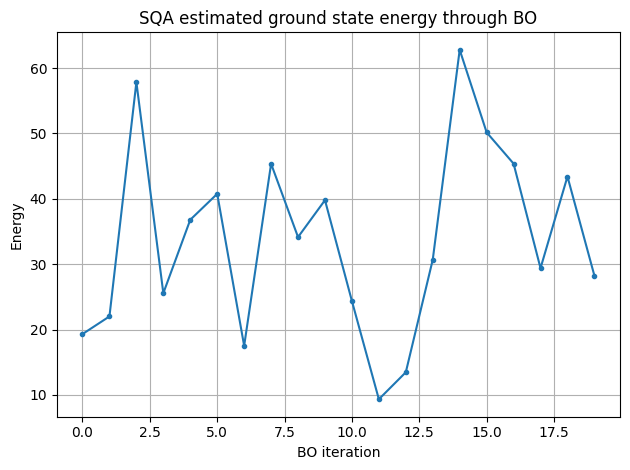

In [7]:
energies = np.array([t[1] for t in history])
x = np.array([t[0] for t in history])

plt.figure()
plt.plot(range(n_iters), energies,'.-')
plt.xlabel('BO iteration')
plt.ylabel('Energy')
plt.title('SQA estimated ground state energy through BO')
plt.grid(True)
plt.tight_layout()
plt.show()